## Initialization

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
import numpy as np
import pandas as pd
import seaborn as sns
import keras.utils
import keras.backend as K
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import utils as np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers.advanced_activations import LeakyReLU

sns.set_style('whitegrid')

## Data Preprocessing

In [10]:
# Bank-note 

# load the banknote dataset and summarize the shape
from pandas import read_csv
# define the location of the dataset
url = r"C:\Users\User\Downloads\Compressed\BankNote_Authentication.csv"
# load the dataset
df = read_csv(url)
# summarize shape
print("Shape of the dataset: " + str(df.shape))

# Number of classes - Binary 
print("Number of classes: " + str(df['class'].unique()))
df

Shape of the dataset: (1372, 5)
Number of classes: [0 1]


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


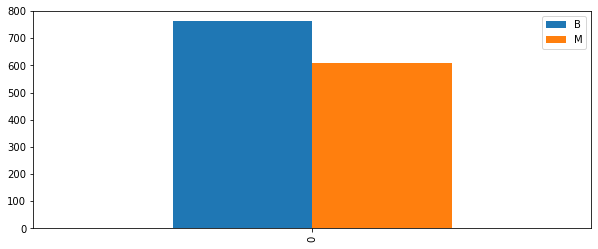

In [13]:
data_B = df[df['class'] == 0]
data_M = df[df['class'] == 1]

B_M_data = {'B': [data_B.shape[0]], 'M': [data_M.shape[0]]}
B_M_df = pd.DataFrame(data=B_M_data)
B_M_df.plot(kind='bar', figsize=(10,4))

scaler = MinMaxScaler()
numerical = ['variance','skewness','curtosis','entropy']
df[numerical] = scaler.fit_transform(df[numerical])

diagnosis = df['class']
features = df.drop(['class'], axis = 1)
# print(df.describe())
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(features, diagnosis, test_size=0.25, random_state=42)

# Reindex
X_train_b = X_train_b.reset_index(drop=True)
X_test_b = X_test_b.reset_index(drop=True)
y_train_b = y_train_b.reset_index(drop=True)
y_test_b = y_test_b.reset_index(drop=True)

# Convert Pandas DataFrame to Numpy ndarray
#  This conversion is necessary because Pandas DataFrame is not consist with Keras API.

X_train_b = X_train_b.values
y_train_b = y_train_b.values
X_test_b  = X_test_b.values
y_test_b  = y_test_b.values

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


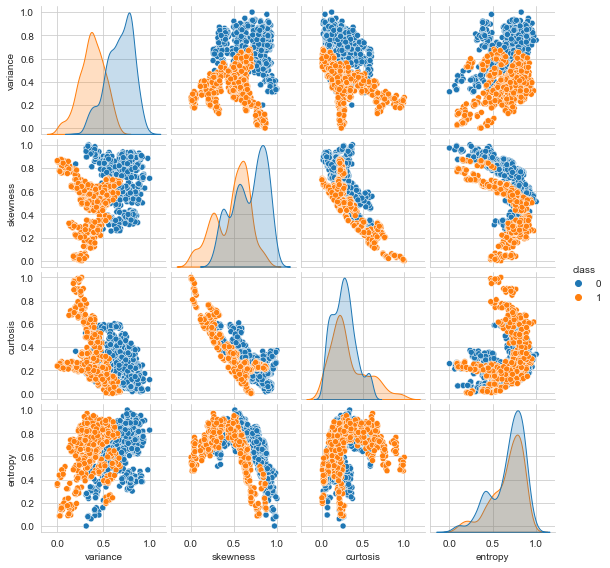

In [76]:
# Scatter plots of all pairs of attributes
plt.close()
sns.pairplot(df, hue = 'class', size = 2, diag_kind = 'kde')
plt.show()

## Custom function for Recall, Precision, F1 and Plot_fig w.r.t Datasets

In [4]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,epochs+1),history.history['val_accuracy'],label='validation')
    plt.plot(range(1,epochs+1),history.history['accuracy'],label='training')
    plt.legend(loc=0)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.xlim([1,epochs])
#     plt.ylim([0,1])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('img/'+str(i)+'-accuracy.jpg')
    plt.close(fig)

## Model Initialization

In [137]:
import tensorflow as tf

nin = len(numerical)
nh  = 512
nout = 2
epochs = 100 
batch_size = 10

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(nin, )),
    tf.keras.layers.Dense(nh, activation=activation),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nout, activation='softmax')
  ])

In [ ]:
# Final parameter values for Layers in the Models

In [138]:
import json
layer_ = 1
model = create_model()
print("Initial Parameters")
print("----------"*3)
for layer in model.layers:
    g=layer.get_config()
    print('Layer: {}'.format(layer_))
    print("----------"*3)
    print (json.dumps(g, indent=2, default=str))
    layer_ += 1
    print("----------"*3)

Initial Parameters
------------------------------
Layer: 1
------------------------------
{
  "name": "flatten_37",
  "trainable": true,
  "batch_input_shape": [
    null,
    4
  ],
  "dtype": "float32",
  "data_format": "channels_last"
}
------------------------------
Layer: 2
------------------------------
{
  "name": "dense_88",
  "trainable": true,
  "dtype": "float32",
  "units": 512,
  "activation": "linear",
  "use_bias": true,
  "kernel_initializer": {
    "class_name": "GlorotUniform",
    "config": {
      "seed": null
    }
  },
  "bias_initializer": {
    "class_name": "Zeros",
    "config": {}
  },
  "kernel_regularizer": null,
  "bias_regularizer": null,
  "activity_regularizer": null,
  "kernel_constraint": null,
  "bias_constraint": null
}
------------------------------
Layer: 3
------------------------------
{
  "name": "dropout_42",
  "trainable": true,
  "dtype": "float32",
  "rate": 0.2,
  "noise_shape": null,
  "seed": null
}
------------------------------
Layer: 

## Testing best AF w.r.t the Datasets without Grid Search

Epoch 1/100
103/103 [==============================] - 2s 9ms/step - loss: 0.6102 - accuracy: 0.6616 - f1_m: 0.5857 - precision_m: 0.4290 - recall_m: 1.0000 - val_loss: 0.4652 - val_accuracy: 0.8309 - val_f1_m: 0.5952 - val_precision_m: 0.4476 - val_recall_m: 0.9714
Epoch 2/100
103/103 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8436 - f1_m: 0.5892 - precision_m: 0.4359 - recall_m: 0.9928 - val_loss: 0.3688 - val_accuracy: 0.8455 - val_f1_m: 0.5952 - val_precision_m: 0.4476 - val_recall_m: 0.9714
Epoch 3/100
103/103 [==============================] - 0s 4ms/step - loss: 0.3024 - accuracy: 0.8946 - f1_m: 0.6147 - precision_m: 0.4646 - recall_m: 0.9907 - val_loss: 0.2495 - val_accuracy: 0.9359 - val_f1_m: 0.5952 - val_precision_m: 0.4476 - val_recall_m: 0.9714
Epoch 4/100
103/103 [==============================] - 0s 5ms/step - loss: 0.2307 - accuracy: 0.9371 - f1_m: 0.5968 - precision_m: 0.4486 - recall_m: 1.0000 - val_loss: 0.1918 - val_accuracy: 0.9388 

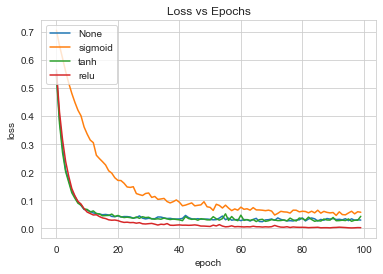

In [139]:
# fit model using Adam optimizer
for activation in [None, 'sigmoid', 'tanh', 'relu']:
    model = create_model()
    opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy',f1_m,precision_m, recall_m])
    history = model.fit(X_train_b, y_train_b,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_b, y_test_b))
    plt.plot(history.history['loss'])
loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = model.evaluate(X_test_b, y_test_b, verbose=0)

plt.title('Loss vs Epochs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper left')

In [140]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_96 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 2)                 1026      
Total params: 3,586
Trainable params: 3,586
Non-trainable params: 0
_________________________________________________________________


<class 'list'>


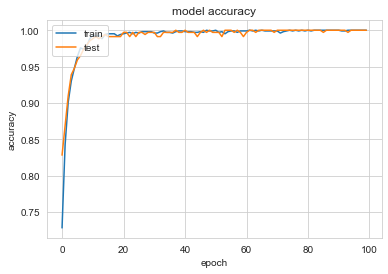

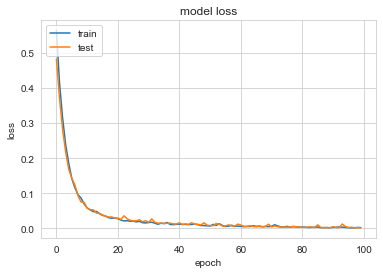

In [141]:
print(type(history.history['accuracy']))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
f1_score_4

0.6117305159568787

## Save the model and its weights with custom function for future usage

In [194]:
model.save(r"C:\Users\User\Downloads\bank_note.h5")
model.save_weights(r"C:\Users\User\Downloads\bank_note_weights")
model.load_weights(r"C:\Users\User\Downloads\bank_note.h5")

# Recreate the exact same model, including its weights and the optimizer
dependencies = {
    'f1_m': f1_m,
    'precision_m':precision_m,
    'recall_m':recall_m,
}
model.load_weights(r"C:\Users\User\Downloads\bank_note_weights")
new_model = tf.keras.models.load_model(r"C:\Users\User\Downloads\bank_note.h5", custom_objects=dependencies)
new_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc', f1_m, precision_m, recall_m])
# Show the model architecture
new_model.summary()

loss_4, accuracy_4, f1_score_4, precision_4, recall_4 = new_model.evaluate(X_test_b, y_test_b, verbose=0)

print("Loss: " + str(loss_4))
print("Accuracy: " + str(accuracy_4))
print("F1 Score: " + str(f1_score_4))
print("Precision: " + str(precision_4))
print("Recall: " + str(recall_4))

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_41 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_96 (Dense)             (None, 512)               2560      
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 2)                 1026      
Total params: 3,586
Trainable params: 3,586
Non-trainable params: 0
_________________________________________________________________
Loss: 0.0015304324915632606
Accuracy: 1.0
F1 Score: 0.6117305159568787
Precision: 0.4429347813129425
Recall: 1.0
